<a href="https://colab.research.google.com/github/Terrencebosco/Build_week_2/blob/master/Build_week_2_(concept).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
# imports
import requests
from bs4 import BeautifulSoup
from csv import writer
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
from random import randint
import pandas as pd
import numpy as np
import re

In [ ]:
# link to web page for feature reference. 

# https://www.cars.com/for-sale/searchresults.action/?fuelTypeId=31763&page=1&perPage=100&prMx=10000&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&yrId=27381%2C34923%2C39723%2C47272%2C51683%2C56007%2C58487%2C30031936%2C35797618%2C36362520%2C36620293&zc=33408

In [206]:
# building web scraper for cars.com ## 
#. search param
#.. max price = 10k, year = 2010-2020, used, gas 

# number of web pages
pages = np.arange(1,51)

# start a file for the data to save to
with open('cars.csv','w') as csv_file:
    csv_writer = writer(csv_file)
    # ,'Int_color','Transmission','Drivetrain'
    headers = ['Price','Car','Mileage','Ext_color','Int_color','Transmission','Drivetrain']
    csv_writer.writerow(headers)

# loop over the number of pages to gather data
    for page in pages:
        response = requests.get('https://www.cars.com/for-sale/searchresults.action/?fuelTypeId=31763&page='+str(page)+'&perPage=100&prMx=10000&rd=500&searchSource=PAGINATION&sort=relevance&stkTypId=28881&yrId=27381%2C34923%2C39723%2C47272%2C51683%2C56007%2C58487%2C30031936%2C35797618%2C36362520%2C36620293&zc=33408')
        soup = BeautifulSoup(response.text, 'html.parser')
        sleep(randint(2,10))
        posts = soup.find_all('div', class_='listing-row__details')

        # gather the important information
        for post in posts:
            
            try:
                price = post.find(class_='listing-row__price').get_text().replace('\n','').strip(' ')
            except:
                'Missing'
            
            try:
                mileage = post.find(class_ = 'listing-row__mileage').get_text().replace('\n','').strip(' ')
            except:
                'Missing'
            
            try:
                car = post.find(class_='listing-row__title').get_text().replace('\n','').strip(' ')
            except:
                'Missing'
            
            try:
                ext_color = post.find( class_ = 'listing-row__meta').li.get_text().replace('\n','').strip(' ').strip('Ext. Color:')
            except:
                'Missing'

            try:
                int_color = post.find( class_ = 'listing-row__meta').li.find_next('li').get_text().replace('\n','').strip(' ').strip('nInt. Color:')
            except:
                'Missing'

            try:
                transmission = post.find( class_ = 'listing-row__meta').li.find_next('li').find_next('li').get_text().replace('\n','').strip('Transmission:').strip(' ')
            except:
                'Missing'

            try:
                drivetrain = post.find( class_ = 'listing-row__meta').li.find_next('li').find_next('li').find_next('li').get_text().replace('\n','').strip('Drivetrain:').strip(' ')
            except:
                'Missing'


            csv_writer.writerow([price, car, mileage, ext_color, int_color, transmission, drivetrain])


# read in new file
df = pd.read_csv('/content/cars10.csv')

# make file a padas data frame
df = pd.DataFrame(df)

# check the shape of the data
df.shape

(4997, 7)

In [209]:
# read in new data
df = pd.read_csv('/content/cars.csv')

In [211]:
# remove missing data
df['Mileage'] = df['Mileage'].replace('-- ',np.nan)

In [213]:
## data formatting and cleaning ##

# remove unwanted character
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '')

df['Mileage'] = df['Mileage'].replace('-- ',np.nan)
df['Mileage'] = df['Mileage'].str.replace(',', '')
df['Mileage'] = df['Mileage'].str.replace('mi.', '')

# check strip 
df.head()

# change data type from string to int
df['Price'] = pd.to_numeric(df['Price'])
df['Mileage'] = pd.to_numeric(df['Mileage'])

# remove outlier at price = 0
df =  df[df['Price'] > 1000]

In [215]:
# look at data
df.describe(include='all')

,Price,Car,Mileage,Ext_color,Int_color,Transmission,Drivetrain
count,4996.000000,4996,4993.000000,4996,4996,4996,4996
unique,NaN,1677,NaN,14,12,5,6
top,NaN,2018 Nissan Versa 1.6 SV,NaN,White,Black,Automatic,FWD
freq,NaN,73,NaN,953,2037,3646,4488
mean,8183.432946,NaN,84298.800721,NaN,NaN,NaN,NaN
std,1580.551286,NaN,34345.450155,NaN,NaN,NaN,NaN
min,2450.000000,NaN,130.000000,NaN,NaN,NaN,NaN
25%,6997.000000,NaN,60129.000000,NaN,NaN,NaN,NaN
50%,8498.000000,NaN,82860.000000,NaN,NaN,NaN,NaN
75%,9500.000000,NaN,106000.000000,NaN,NaN,NaN,NaN


In [225]:
# number of missing values
df.isnull().sum()

Price           0
Car             0
Mileage         3
Ext_color       0
Int_color       0
Transmission    0
Drivetrain      0
dtype: int64

In [224]:
df

,Price,Car,Mileage,Ext_color,Int_color,Transmission,Drivetrain
0,3999,2011 Audi A4 2.0T Premium,124128.0,White,Black,CVT,FWD
1,5999,2013 Nissan Altima 2.5 SL,85057.0,Black,Gray,CVT,FWD
2,9798,2017 Nissan Sentra SV,23773.0,Silve,Gray,CVT,FWD
3,9900,2015 Nissan Sentra SR,53007.0,Red,Gray,CVT,FWD
4,10000,2013 Volvo S60 T5,34647.0,Black,Beige,Automatic,FWD
...,...,...,...,...,...,...,...
4992,7490,2013 Hyundai Elantra GLS,123918.0,Blue,Gray,Automatic,FWD
4993,9990,2012 Toyota Camry L,136363.0,Black,Black,Automatic,FWD
4994,9180,2013 Kia Sorento LX,108888.0,Green,Othe,Automatic,FWD
4995,9998,2012 Mazda Mazda3 i Grand Touring,109749.0,Black,Black,Automatic,FWD


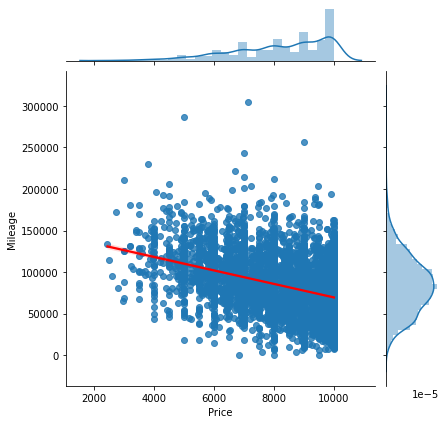

In [219]:
# quick plot price vs mileage
sns.jointplot(x="Price", y="Mileage", data=df, kind='reg',joint_kws={'line_kws':{'color':'red'}});

In [221]:
# save cleaned data to new csv
df.to_csv('build_week_2_data_2.csv',index=False)